In [38]:
import torch
from src.models.utils.create_batch import EarthDataTrain

# from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
# import numpy as np
# import glob
from pathlib import Path
# import os
import matplotlib.pyplot as plt
# import re

%matplotlib inline

# to clear outputs from cells
from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build Data Loader
Practice building the data loader that Pytorch will use.

Good reseource on building data loader: https://github.com/ugent-korea/pytorch-unet-segmentation/blob/master/src/dataset.py

... and here too: https://github.com/utkuozbulak/pytorch-custom-dataset-examples

In [49]:
root_dir = Path.cwd().parent.parent # set the root directory as a Pathlib path
print(root_dir)

path_input_folder = root_dir / 'data/processed/input'
path_truth_folder = root_dir / 'data/processed/truth'

/project/6047694/tvhahn/earth-mantle-surrogate


In [118]:
earth_dataset = EarthDataTrain(path_input_folder, path_truth_folder, var_to_include=1)



torch.Size([1, 198, 118, 38])
dict_keys(['truth', 'input', 'upsampled', 'time_step_index'])
061


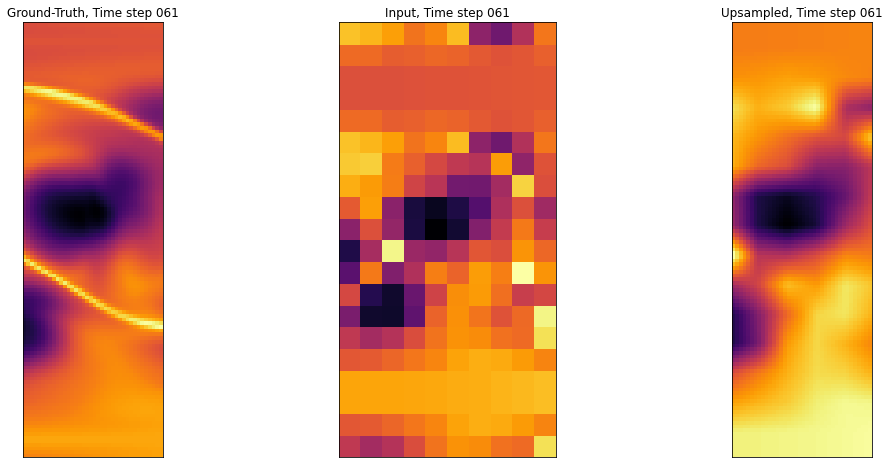

In [124]:
sample = earth_dataset[1]
print(sample['truth'].shape)
print(sample.keys())
print(sample['time_step_index'])

color_scheme='inferno'
fig, ax = plt.subplots(1,3, figsize=(18,8))

title_list = ['Ground-Truth', 'Input', 'Upsampled']
for i, k in enumerate(['truth', 'input', 'upsampled']):
    ax[i].pcolormesh(sample[k][0,0,:,:], cmap=color_scheme)
    ax[i].set_aspect(1)
    ax[i].set_title(f"{title_list[i]}, Time step {sample['time_step_index']}")
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    
# plt.savefig('truth_input_1.png', dpi=300)
plt.show()

In [61]:
sample.keys()

dict_keys(['truth', 'input', 'upsampled'])

Instantiate the class.

In [48]:
train_loader = DataLoader(
    earth_dataset,
    batch_size=1,
    shuffle=True,
)
for batch_idx, data in enumerate(train_loader):
    pass

x_234.npy
x_146.npy
x_144.npy
x_103.npy
x_024.npy


KeyboardInterrupt: 

x_115.npy


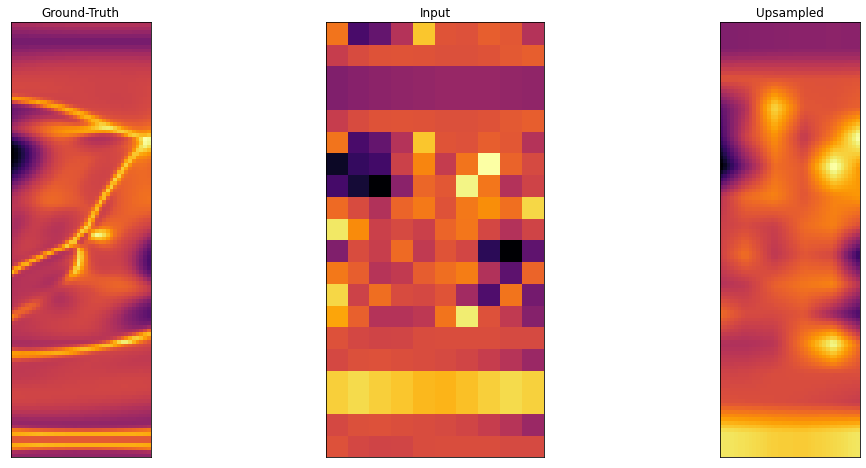

In [14]:
sample['input'].shape[1]

30

In [20]:
sample = earth_dataset[0]

color_scheme='inferno'


title_list = ['Ground-Truth', 'Input', 'Upsampled']
for r_index in range(sample['input'].shape[1]):
    fig, ax = plt.subplots(1,3, figsize=(18,8))
    for i, k in enumerate(sample.keys()):
        
       
    
        ax[i].pcolormesh(sample[k][0,r_index,:,:], cmap=color_scheme)
        ax[i].set_aspect(1)
        ax[i].get_xaxis().set_visible(False)
        ax[i].get_yaxis().set_visible(False)
#     ax[i].set_title(title_list[i])
    
    plt.savefig(f'{r_index}.png', dpi=300)
    plt.cla()
    plt.close()
    

In [18]:
sample[k][0,0,:,:].shape

torch.Size([118, 38])

In [6]:
dataset_loader = torch.utils.data.DataLoader(earth_dataset,
                                             batch_size=2, shuffle=True,
                                             num_workers=2)

In [7]:
dataset_loader

In [8]:
for i in dataset_loader:
    print(type(i))

<class 'dict'>


In [9]:
i['truth'].shape

torch.Size([2, 4, 198, 118, 38])

# Import Dataloader from src

In [10]:
from src.models.utils.create_batch import EarthDataTrain

In [11]:
root_dir = Path.cwd().parent # set the root directory as a Pathlib path

path_input_folder = root_dir / 'data/processed/input'
path_truth_folder = root_dir / 'data/processed/truth'

earth_dataset = EarthDataTrain(path_input_folder, path_truth_folder)

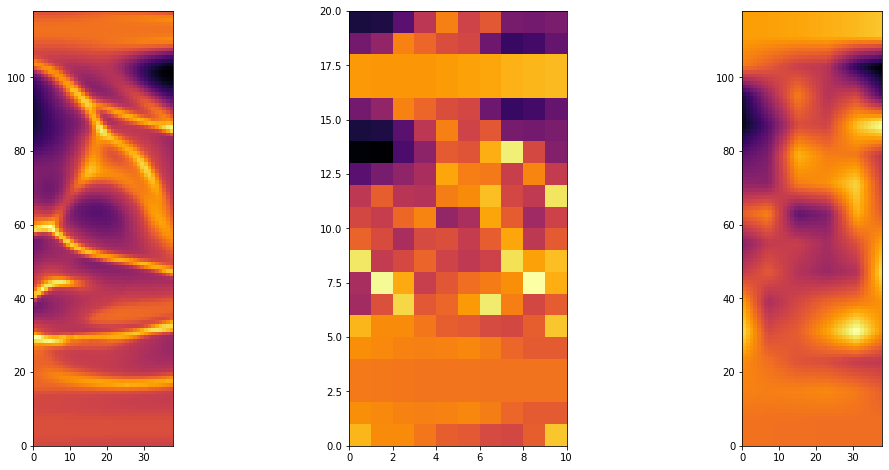

In [8]:
sample = earth_dataset[0]

color_scheme='inferno'
fig, ax = plt.subplots(1,3, figsize=(18,8))

for i, k in enumerate(sample.keys()):
    ax[i].pcolormesh(sample[k][0,0,:,:], cmap=color_scheme)
    ax[i].set_aspect(1)
    

plt.show()

In [24]:
loader = DataLoader(
    earth_dataset,
    batch_size=2,
    shuffle=True,
)

In [25]:
for batch_idx, data in enumerate(loader):
    x = data

In [26]:
x.keys()

dict_keys(['truth', 'input', 'upsampled'])

In [27]:
x['truth'].shape

torch.Size([2, 4, 198, 118, 38])

In [28]:
x['input'].shape

torch.Size([2, 4, 30, 20, 10])

In [29]:
x['upsampled'].shape

torch.Size([2, 4, 198, 118, 38])